In [1]:
!pip install gdelt
import gdelt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

here
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
children_mortality = pd.read_csv('/content/drive/MyDrive/children_mortality_rate.csv')
adult_mortality = pd.read_csv('/content/drive/MyDrive/adult_mortality_rate.csv')
suicide_rates = pd.read_csv('/content/drive/MyDrive/suicide_rates.csv')
poverty = pd.read_csv('/content/drive/MyDrive/poverty.csv')

In [3]:
children_mortality['Value_Cleaned'] = children_mortality['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'].astype(float)
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'] * 100

# Select the required columns
filtered_children_mortality = children_mortality[['Value_Cleaned', 'Location', 'Period']]
filtered_children_mortality = filtered_children_mortality.rename(columns={'Value_Cleaned': f'Value_children_mortality'})


In [4]:
suicide_rates['Value_Cleaned'] = suicide_rates['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'].astype(float)
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'] * 100

# Select the required columns
filtered_suicide_rates = suicide_rates[['Value_Cleaned', 'Location', 'Period']]
filtered_suicide_rates = filtered_suicide_rates.rename(columns={'Value_Cleaned': f'Value_suicide_rates'})


In [5]:
# filtering the columns
filtered_adult_mortality = adult_mortality[['Value', 'Location', 'Period']]
filtered_poverty = poverty[['Value', 'Location', 'Period']]
# Renaming the columns
filtered_adult_mortality = adult_mortality.rename(columns={'Value': 'Value_adult_mortality'})[['Value_adult_mortality', 'Location', 'Period']]
filtered_poverty = poverty.rename(columns={'Value': 'Value_poverty'})[['Value_poverty', 'Location', 'Period']]

In [6]:
merged_data = filtered_children_mortality.merge(filtered_adult_mortality, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_suicide_rates, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_poverty, on=['Location', 'Period'], how='inner')

In [7]:
who_data = merged_data.groupby(['Location', 'Period']).sum().reset_index()

In [8]:
who_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty
0,Afghanistan,2007,15030.0,7353,12960.0,11.61
1,Afghanistan,2013,12240.0,6336,10800.0,21.60
2,Afghanistan,2016,31590.0,19791,32400.0,67.23
3,Albania,2002,16200.0,8235,37260.0,81.27
4,Albania,2005,14580.0,8532,60480.0,83.97


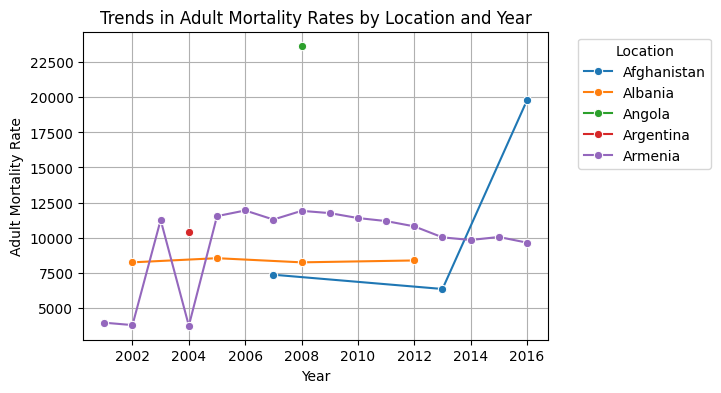

In [9]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_adult_mortality', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

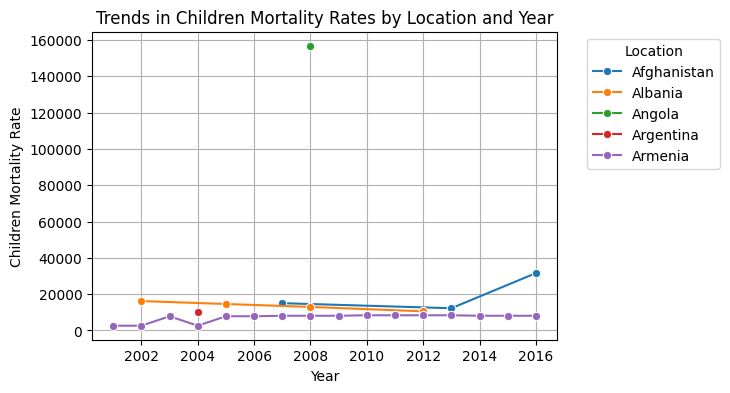

In [10]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_children_mortality', hue='Location', marker='o')
plt.title('Trends in Children Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Children Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

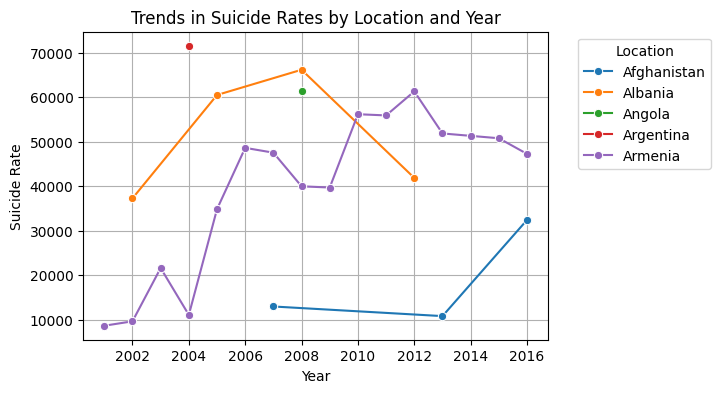

In [11]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_suicide_rates', hue='Location', marker='o')
plt.title('Trends in Suicide Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

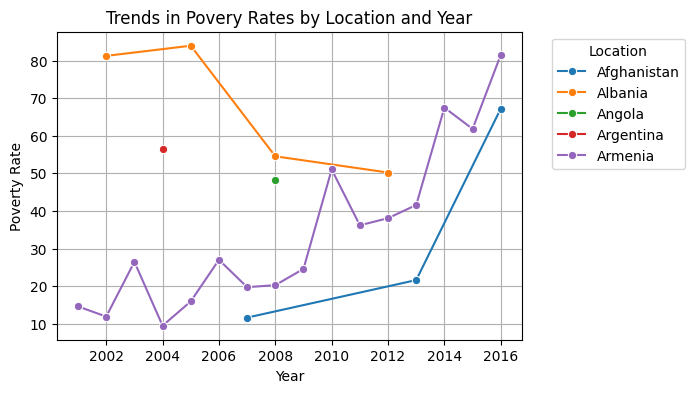

In [12]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_poverty', hue='Location', marker='o')
plt.title('Trends in Povery Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [13]:
who_data.isna().sum()

Location                    0
Period                      0
Value_children_mortality    0
Value_adult_mortality       0
Value_suicide_rates         0
Value_poverty               0
dtype: int64

In [14]:
import gdelt

In [15]:
gd1 = gdelt.gdelt(version=1)
gkg_results = gd1.Search(['2015 03 15', '2015 04 15'], table='gkg')
gkg_df = pd.DataFrame(gkg_results)

In [16]:
health_keyword = ['HEALTH_NEWS', 'HEALTH', 'DISEASE_OUTBREAK']
health_df = gkg_df[gkg_df['THEMES'].str.contains('|'.join(health_keyword), case=False, na=False)]
health_df.head()

,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
11,20150401,1,NaN,SHORTAGE;TAX_FNCACT;TAX_FNCACT_WOMEN;WB_2433_C...,"4#Sydney, New South Wales, Australia#AS#AS02#-...",eman sharobeem,women health service,"-13.5593220338983,0.847457627118644,14.4067796...",421973688,australianherald.com,http://www.australianherald.com/index.php/sid/...
20,20150401,1,NaN,TAX_FNCACT;TAX_FNCACT_DIRECTORS;WB_315_INTERNA...,1#Italy#IT#IT#42.8333#12.8333#IT,banco desio lazio;chiara assicurazione;giorgio...,marco rubino di musebbi community srl consulen...,"-0.156494522691706,1.82576943140323,1.98226395...",NaN,4-traders.com,http://www.4-traders.com/BANCO-DI-DESIO-E-DELL...
22,20150401,1,NaN,EDUCATION;SOC_POINTSOFINTEREST;SOC_POINTSOFINT...,1#Ghana#GH#GH#8#-2#GH,joyce aryee,school of ghana technology university college;...,"-2.35042735042735,4.27350427350427,6.623931623...",NaN,spyghana.com,http://www.spyghana.com/ghana-technology-unive...
32,20150401,1,NaN,KILL;GENERAL_HEALTH;MEDICAL;SOC_POINTSOFINTERE...,"4#Baku, Baki*, Azerbaijan#AJ#AJ09#40.3953#49.8...",kathleen reock ketofsky;ernest c reock jr;jean...,jersey college for women;terms of service;jers...,"-3.97877984084881,1.06100795755968,5.039787798...",NaN,centraljersey.com,http://m.centraljersey.com/articles/2015/04/01...
52,20150401,1,NaN,TAX_FNCACT;TAX_FNCACT_LADY;WB_644_NUTRITION;WB...,"2#New York, United States#US#USNY#42.1497#-74....",chirlane mccray;hillary rodham clinton,clinton foundation,"1.6,2.4,0.8,3.2,12.8,0","421901884,421812350,422064983,422065187,422085...",oneidadispatch.com,http://www.oneidadispatch.com/general-news/201...


In [17]:
events_results = gd1.Search(['2015 03 21', '2015 03 23'], coverage=True, table='events')
events_df = pd.DataFrame(events_results)

In [18]:
# Merge the DataFrames on the specified columns
events_df['GLOBALEVENTID'] = events_df['GLOBALEVENTID'].astype(str)

merged_df = pd.merge(events_df, health_df, left_on='GLOBALEVENTID', right_on='CAMEOEVENTIDS')

In [19]:
relevant_columns = ['Year','ActionGeo_FullName', 'CAMEOCodeDescription', 'Actor1Name', 'Actor2Name']
gdelt_data = merged_df[relevant_columns]
gdelt_data.head()

,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,2015,Syria,Occupy territory,SYRIA,TURKEY
1,2015,United States,Praise or endorse,NaN,BUSINESS
2,2015,NaN,"Use conventional military force, not specifie...",NaN,POLICE
3,2015,NaN,"Use conventional military force, not specifie...",NaN,POLICE
4,2015,"Iwo Jima, Japan (general), Japan","Conduct suicide, car, or other non-military b...",NaN,JAPAN


In [20]:
gdelt_data.isna().sum()

Year                       0
ActionGeo_FullName       537
CAMEOCodeDescription       0
Actor1Name               605
Actor2Name              3591
dtype: int64

In [21]:
gdelt_data = gdelt_data.dropna(subset=['ActionGeo_FullName', 'Actor1Name', 'Actor2Name'])
gdelt_data.isna().sum()

Year                    0
ActionGeo_FullName      0
CAMEOCodeDescription    0
Actor1Name              0
Actor2Name              0
dtype: int64

In [22]:
final_data = pd.merge(who_data, gdelt_data, left_on=['Location', 'Period'], right_on=['ActionGeo_FullName', 'Year'], how='inner')


In [23]:
final_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",AUSTRALIA,AUSTRALIA
1,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",AUSTRALIA,AUSTRALIA
2,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",AUSTRALIA,AUSTRALIA
3,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",AUSTRALIA,SAN ANTONIO
4,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Provide aid, not specified below",A US,A US


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
final_data['CAMEOCode_Encoded'] = label_encoder.fit_transform(final_data['CAMEOCodeDescription'])

final_data.drop(['CAMEOCodeDescription'], axis=1, inplace=True)

final_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty,Year,ActionGeo_FullName,Actor1Name,Actor2Name,CAMEOCode_Encoded
0,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,AUSTRALIA,AUSTRALIA,2
1,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,AUSTRALIA,AUSTRALIA,2
2,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,AUSTRALIA,AUSTRALIA,2
3,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,AUSTRALIA,SAN ANTONIO,2
4,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,A US,A US,16


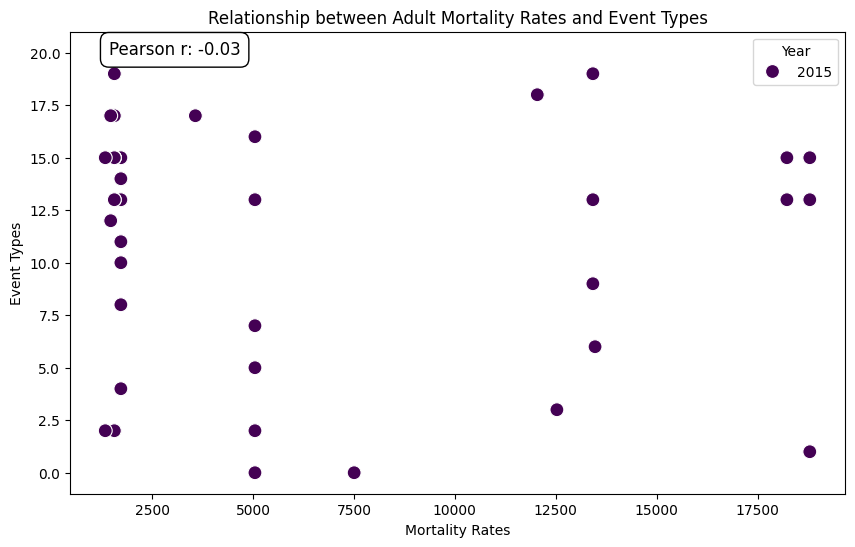

In [30]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_adult_mortality', y='CAMEOCode_Encoded', hue='Year', palette='viridis', s=100)

# Pearson correlation
correlation_coef, _ = pearsonr(final_data['Value_adult_mortality'], final_data['CAMEOCode_Encoded'])

plt.annotate(f'Pearson r: {correlation_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Relationship between Adult Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

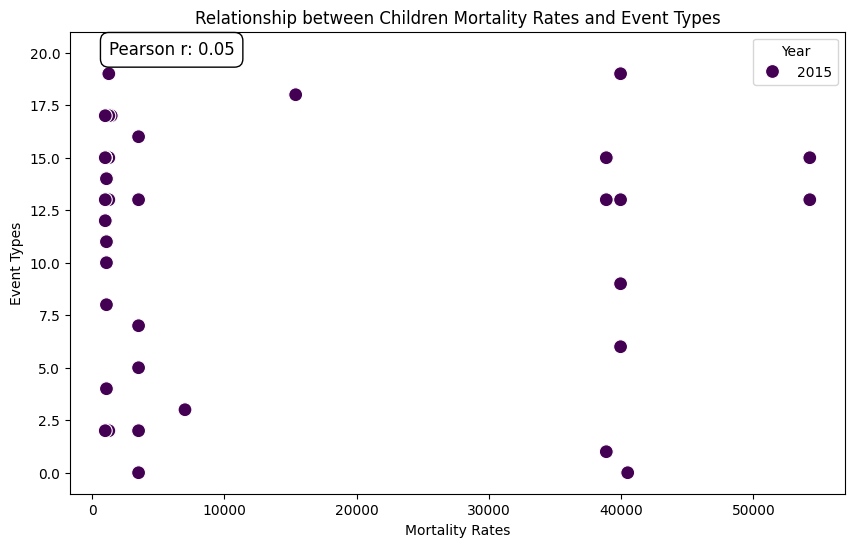

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_children_mortality', y='CAMEOCode_Encoded', hue='Year', palette='viridis', s=100)

# Pearson correlation
correlation_coef, _ = pearsonr(final_data['Value_children_mortality'], final_data['CAMEOCode_Encoded'])

plt.annotate(f'Pearson r: {correlation_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Relationship between Children Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

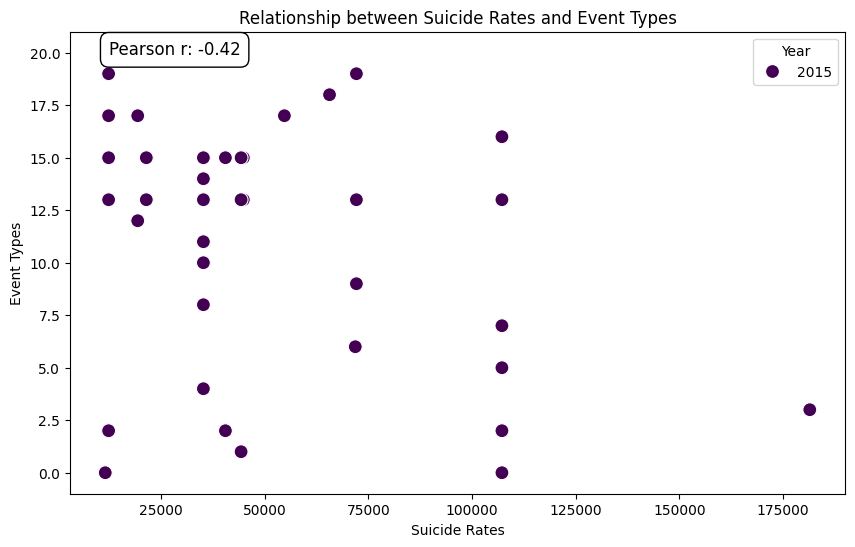

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCode_Encoded', hue='Year', palette='viridis', s=100)

# Pearson correlation
correlation_coef, _ = pearsonr(final_data['Value_suicide_rates'], final_data['CAMEOCode_Encoded'])

plt.annotate(f'Pearson r: {correlation_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Relationship between Suicide Rates and Event Types')
plt.xlabel('Suicide Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

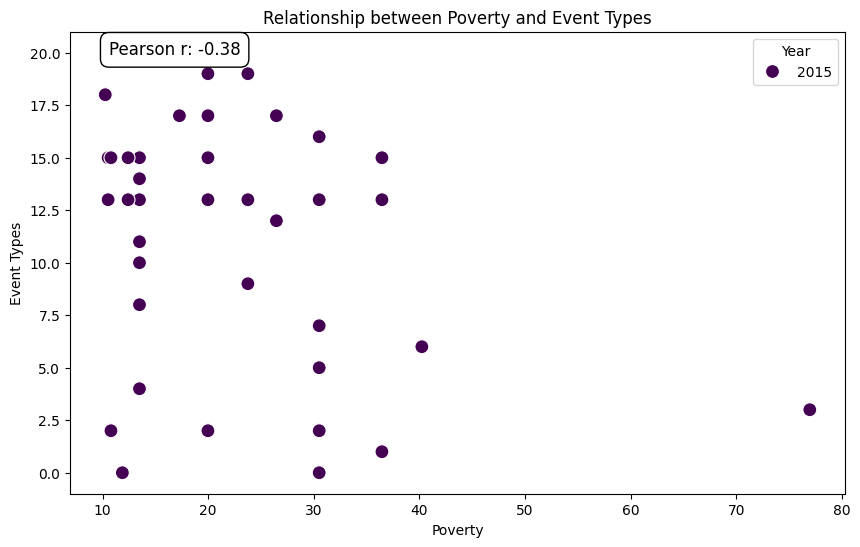

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_poverty', y='CAMEOCode_Encoded', hue='Year', palette='viridis', s=100)

# Pearson correlation
correlation_coef, _ = pearsonr(final_data['Value_poverty'], final_data['CAMEOCode_Encoded'])

plt.annotate(f'Pearson r: {correlation_coef:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Relationship between Poverty and Event Types')
plt.xlabel('Poverty')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()